Кратчайший путь от Щелковская до Деловой центр: ['Щелковская', 'Первомайская', 'Измайловская', 'Партизанская', 'Семеновская', 'Электрозаводская', 'Останкино', 'Марьина Роща', 'Савеловская', 'Белорусская', 'Беговая', 'Тестовская', 'Деловой центр']


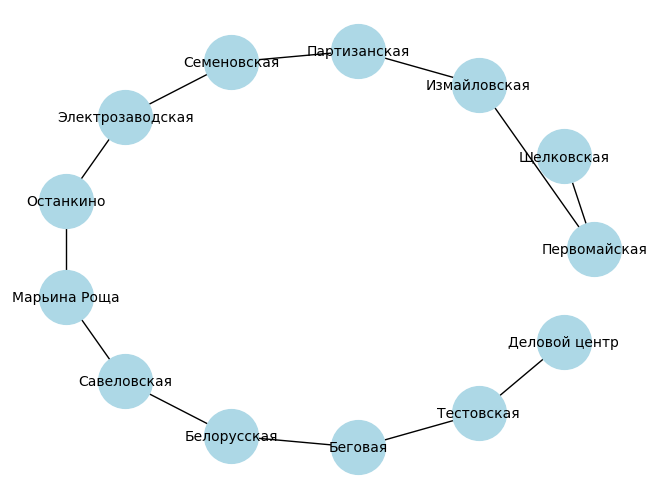

In [1]:
from collections import defaultdict, deque
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
# Создаем граф метро Москвы
metro_graph = {
    'Щелковская': ['Первомайская'],
    'Первомайская': ['Измайловская', 'Щелковская'],
    'Измайловская': ['Партизанская', 'Первомайская', 'Измайлово'],
    'Партизанская': ['Семеновская', 'Измайловская', 'Локомотив', 'Черкизовская', 'Соколиная Гора'],
    'Измайлово': ['Семеновская', 'Измайловская', 'Локомотив', 'Черкизовская', 'Соколиная Гора'],
    'Семеновская': ['Электрозаводская', 'Партизанская'],
    'Электрозаводская': ['Бауманская', 'Сокольники', 'Авиамоторная', 'Семеновская', 'Останкино', 'Казанский вокзал',
                         'Сортировочная'],
    'Бауманская': ['Электрозаводская', 'Курская'],
    'Курская': ['Бауманская', 'Площадь Революции', 'Театральная', 'Охотный ряд', 'Сретенский бульвар', 'Тургеневская',
                'Чистые пруды', 'Римская', 'Площадь Ильича', 'Серп и Молот', 'Москва-Товарная'],
    'Чкаловская': ['Бауманская', 'Площадь Революции', 'Театральная', 'Охотный ряд', 'Сретенский бульвар',
                   'Тургеневская', 'Чистые пруды', 'Римская', 'Площадь Ильича', 'Серп и Молот', 'Москва-Товарная'],
    'Площадь Революции': ['Тверская', 'Пушкинская', 'Чеховская', 'Курская', 'Чкаловская', 'Новокузнецкая',
                          'Третьяковская', 'Александровский сад', 'Библиотека имени Ленина', 'Боровицкая', 'Арбатская'],
    'Театральная': ['Тверская', 'Пушкинская', 'Чеховская', 'Курская', 'Чкаловская', 'Новокузнецкая', 'Третьяковская',
                    'Александровский сад', 'Библиотека имени Ленина', 'Боровицкая', 'Арбатская'],
    'Охотный ряд': ['Тверская', 'Пушкинская', 'Чеховская', 'Курская', 'Чкаловская', 'Новокузнецкая', 'Третьяковская',
                    'Александровский сад', 'Библиотека имени Ленина', 'Боровицкая', 'Арбатская'],
    'Арбатская': ['Арбатская(М4)', 'Смоленская', 'Кропоткинская', 'Полянка', 'Площадь Революции', 'Охотный ряд',
                  'Театральная', 'Пушкинская', 'Тверская', 'Чеховская'],
    'Боровицкая': ['Арбатская(М4)', 'Смоленская', 'Кропоткинская', 'Полянка', 'Площадь Революции', 'Охотный ряд',
                   'Театральная', 'Пушкинская', 'Тверская', 'Чеховская'],
    'Александровский сад': ['Арбатская(М4)', 'Смоленская', 'Кропоткинская', 'Полянка', 'Площадь Революции',
                            'Охотный ряд', 'Театральная', 'Пушкинская', 'Тверская', 'Чеховская'],
    'Библиотека имени Ленина': ['Арбатская', 'Арбатская(М4)', 'Смоленская', 'Кропоткинская', 'Полянка',
                                'Площадь Революции', 'Охотный ряд', 'Театральная', 'Пушкинская', 'Тверская',
                                'Чеховская'],
    'Смоленская': ['Арбатская', 'Боровицкая', 'Библиотека имени Ленина', 'Александровский сад', 'Киевская'],
    'Киевская': ['Смоленская', 'Смоленская(М4)', 'Студенческая', 'Парк Победы', 'Поклонная'],
    'Парк Победы': ['Киевская', 'Славянский бульвар', 'Кутузовская', 'Минская', 'Выставочная', 'Деловой центр',
                    'Тестовская', 'Международная'],
    'Славянский бульвар': ['Парк Победы', 'Поклонная', 'Кунцевская', 'Фили'],
    'Кунцевская': ['Славянский бульвар', 'Молодежная', 'Пионерская', 'Терехово', 'Давыдково', 'Рабочий Поселок'],
    'Молодежная': ['Кунцевская', 'Крылатское'],
    'Крылатское': ['Молодежная', 'Строгино'],
    'Строгино': ['Крылатское', 'Мякинино'],
    'Мякинино': ['Строгино', 'Волоколамская'],
    'Волоколамская': ['Мякинино', 'Митино', 'Трикотажная', 'Пенягино'],
    'Митино': ['Волоколамская', 'Пятницкое шоссе'],
    'Пятницкое шоссе': ['Митино'],
    'Бульвар Рокоссовского': ['Локомотив', 'Черкизовская', 'Белокаменная'],
    'Черкизовская': ['Бульвар Рокоссовского', 'Преображенская площадь', 'Измайлово', 'Партизанская'],
    'Локомотив': ['Бульвар Рокоссовского', 'Преображенская площадь', 'Измайлово', 'Партизанская'],
    'Преображенская площадь': ['Локомотив', 'Черкизовская', 'Сокольники'],
    'Сокольники': ['Преображенская площадь', 'Красносельская', 'Рижская', 'Электрозаводская'],
    'Красносельская': ['Сокольники', 'Казанский вокзал', 'Ленинградский вокзал', 'Площадь трех вокзалов',
                       'Комсомольская'],
    'Казанский вокзал': ['Красные Ворота', 'Красносельская', 'Электрозаводская', 'Останкино', 'Курская', 'Чкаловская',
                         'Проспект Мира', 'Бутырская'],
    'Комсомольская': ['Красные Ворота', 'Красносельская', 'Электрозаводская', 'Останкино', 'Курская', 'Чкаловская',
                      'Проспект Мира', 'Бутырская'],
    'Ленинградский вокзал': ['Красные Ворота', 'Красносельская', 'Электрозаводская', 'Останкино', 'Курская',
                             'Чкаловская', 'Проспект Мира', 'Бутырская'],
    'Площадь трех вокзалов': ['Красные Ворота', 'Красносельская', 'Электрозаводская', 'Останкино', 'Курская',
                              'Чкаловская', 'Проспект Мира', 'Бутырская'],
    'Красные Ворота': ['Казанский вокзал', 'Комсомольская', 'Ленинградский вокзал', 'Площадь трех вокзалов',
                       'Чистые пруды', 'Тургеневская', 'Сретенский бульвар'],
    'Чистые пруды': ['Красные Ворота', 'Лубянка', 'Кузнецкий мост', 'Трубная', 'Курская', 'Чкаловская', 'Сухаревская',
                     'Китай-город'],
    'Тургеневская': ['Красные Ворота', 'Лубянка', 'Кузнецкий мост', 'Трубная', 'Курская', 'Чкаловская', 'Сухаревская',
                     'Китай-город'],
    'Сретенский бульвар': ['Красные Ворота', 'Лубянка', 'Кузнецкий мост', 'Трубная', 'Курская', 'Чкаловская',
                           'Сухаревская', 'Китай-город'],
    'Лубянка': ['Сретенский бульвар', 'Тургеневская', 'Чистые пруды', 'Охотный ряд', 'Театральная', 'Площадь Революции',
                'Пушкинская', 'Тверская', 'Чеховская', 'Китай-город'],
    'Кузнецкий мост': ['Сретенский бульвар', 'Тургеневская', 'Чистые пруды', 'Охотный ряд', 'Театральная',
                       'Площадь Революции', 'Пушкинская', 'Тверская', 'Чеховская', 'Китай-город'],
    'Кропоткинская': ['Парк культуры', 'Библиотека имени Ленина', 'Боровицкая', 'Арбатская', 'Александровский сад'],
    'Парк культуры': ['Кропоткинская', 'Фрунзенская', 'Киевская', 'Октябрьская'],
    'Фрунзенская': ['Парк культуры', 'Спортивная', 'Лужники'],
    'Спортивная': ['Фрунзенская', 'Воробьевы горы', 'Кутузовская', 'Площадь Гагарина', 'Ленинский проспект'],
    'Лужники': ['Фрунзенская', 'Воробьевы горы', 'Кутузовская', 'Площадь Гагарина', 'Ленинский проспект'],
    'Воробьевы горы': ['Лужники', 'Спортивная', 'Университет'],
    'Университет': ['Воробьевы горы', 'Проспект Вернадского'],
    'Проспект Вернадского': ['Университет', 'Юго-западная', 'Новаторская', 'Мичуринский проспект'],
    'Юго-западная': ['Проспект Вернадского', 'Тропарево'],
    'Тропарево': ['Юго-западная', 'Румянцево'],
    'Румянцево': ['Тропарево', 'Саларьево'],
    'Саларьево': ['Румянцево', 'Филагов Луг'],
    'Филагов Луг': ['Саларьево', 'Прокшино'],
    'Прокшино': ['Филагов Луг', 'Ольховая'],
    'Ольховая': ['Прокшино', 'Коммунарка'],
    'Коммунарка': ['Ольховая'],
    'Медведково': ['Бабушкинская'],
    'Бабушкинская': ['Медведково', 'Свиблово'],
    'Свиблово': ['Бабушкинская', 'Ботанический сад'],
    'Ботанический сад': ['Свиблово', 'ВДНХ', 'Ростокино', 'Владыкино'],
    'ВДНХ': ['Ботанический сад', 'Алексеевская'],
    'Алексеевская': ['ВДНХ', 'Рижская'],
    'Рижская': ['Алексеевская', 'Проспект Мира', 'Марьина Роща', 'Сокольники'],
    'Проспект Мира': ['Рижская', 'Сухаревская', 'Новослободская', 'Менделеевская', 'Ленинградский вокзал',
                      'Площадь трех вокзалов', 'Комсомольская', 'Казанский вокзал'],
    'Сухаревская': ['Проспект Мира', 'Чистые пруды', 'Тургеневская', 'Сретенский бульвар'],
    'Китай-город': ['Сретенский бульвар', 'Тургеневская', 'Чистые пруды', 'Новокузнецкая', 'Третьяковская', 'Лубянка',
                    'Кузнецкий мост', 'Таганская', 'Марксистская', 'Пролетарская'],
    'Новокузнецкая': ['Китай-город', 'Площадь Революции', 'Театральная', 'Охотный ряд', 'Павелецкая', 'Октябрьская'],
    'Третьяковская': ['Китай-город', 'Площадь Революции', 'Театральная', 'Охотный ряд', 'Павелецкая', 'Октябрьская'],
    'Октябрьская': ['Третьяковская', 'Новокузнецкая', 'Шаболовская', 'Парк культуры', 'Добрынинская', 'Серпуховская'],
    'Шаболовская': ['Октябрьская', 'Ленинский проспект', 'Площадь Гагарина'],
    'Ленинский проспект': ['Шаболовская', 'Академическая', 'Крымская', 'Спортивная', 'Лужники'],
    'Площадь Гагарина': ['Шаболовская', 'Академическая', 'Крымская', 'Спортивная', 'Лужники'],
    'Академическая': ['Ленинский проспект', 'Площадь Гагарина', 'Профсоюзная'],
    'Профсоюзная': ['Академическая', 'Новые Черемушкины'],
    'Новые Черемушкины': ['Профсоюзная', 'Воронцовская', 'Калужская'],
    'Воронцовская': ['Новые Черемушкины', 'Беляево', 'Новаторская', 'Зюзино'],
    'Калужская': ['Новые Черемушкины', 'Беляево', 'Новаторская', 'Зюзино'],
    'Беляево': ['Коньково', 'Калужская', 'Воронцовская'],
    'Коньково': ['Теплый Стан', 'Беляево'],
    'Теплый Стан': ['Ясенево', 'Коньково'],
    'Ясенево': ['Теплый Стан', 'Битцевский парк', 'Новоясеневская'],
    'Новоясеневская': ['Ясенево', 'Лесопарковая'],
    'Битцевский парк': ['Ясенево', 'Лесопарковая'],
    'Лесопарковая': ['Новоясеневская', 'Битцевский парк', 'Улица Старокачаловская', 'Бульвар Дмитрия Донского'],
    'Улица Старокачаловская': ['Улица Скобелевская', 'Лесопарковая', 'Аннино'],
    'Бульвар Дмитрия Донского': ['Улица Скобелевская', 'Лесопарковая', 'Аннино'],
    'Улица Скобелевская': ['Бульвар Дмитрия Донского', 'Улица Старокачаловская', 'Бульвар Адмирала Ушакова'],
    'Бульвар Адмирала Ушакова': ['Улица Скобелевская', 'Улица Горчакова'],
    'Улица Горчакова': ['Бульвар Адмирала Ушакова', 'Бунинская аллея'],
    'Бунинская аллея': ['Улица Горчакова'],
    'Алтуфьево': ['Биберево'],
    'Биберево': ['Алтуфьево', 'Отрадное'],
    'Отрадное': ['Биберево', 'Владыкино'],
    'Владыкино': ['Отрадное', 'Петровско-Разумовская', 'Ботанический сад', 'Окружная'],
    'Петровско-Разумовская': ['Владыкино', 'Окружная', 'Фонвизинская', 'Останкино', 'Лихоборы', 'Бутырская'],
    'Тимирязевская': ['Петровско-Разумовская', 'Савеловская'],
    'Дмитровская': ['Тимирязевская', 'Савеловская', 'Гражданская', 'Марьина Роща'],
    'Савеловская': ['Дмитровская', 'Тимирязевская', 'Новослободская', 'Менделеевская', 'Динамо', 'Петровский парк',
                    'Марьина Роща', 'Белорусская'],
    'Новослободская': ['Савеловская', 'Цветной бульвар', 'Проспект Мира', 'Белорусская', 'Трубная'],
    'Менделеевская': ['Савеловская', 'Цветной бульвар', 'Проспект Мира', 'Белорусская', 'Трубная'],
    'Цветной бульвар': ['Новослободская', 'Менделеевская', 'Достоевская', 'Чистые пруды', 'Сретенский бульвар',
                        'Тургеневская', 'Тверская', 'Пушкинская', 'Чеховская'],
    'Трубная': ['Новослободская', 'Менделеевская', 'Достоевская', 'Чистые пруды', 'Сретенский бульвар', 'Тургеневская',
                'Тверская', 'Пушкинская', 'Чеховская'],
    'Тверская': ['Трубная', 'Цветной бульвар', 'Маяковская', 'Охотный ряд', 'Театральная', 'Площадь Революции',
                 'Арбатская', 'Боровицкая', 'Библиотека имени Ленина', 'Александровский сад'],
    'Чеховская': ['Трубная', 'Цветной бульвар', 'Маяковская', 'Охотный ряд', 'Театральная', 'Площадь Революции',
                  'Арбатская', 'Боровицкая', 'Библиотека имени Ленина', 'Александровский сад'],
    'Пушкинская': ['Трубная', 'Цветной бульвар', 'Маяковская', 'Охотный ряд', 'Театральная', 'Площадь Революции',
                   'Арбатская', 'Боровицкая', 'Библиотека имени Ленина', 'Александровский сад'],
    'Полянка': ['Боровицкая', 'Арбатская', 'Библиотека имени Ленина', 'Александровский сад', 'Добрынинская',
                'Серпуховская'],
    'Добрынинская': ['Полянка', 'Тульская', 'Павелецкая', 'Октябрьская'],
    'Серпуховская': ['Полянка', 'Тульская', 'Павелецкая', 'Октябрьская'],
    'Тульская': ['Добрынинская', 'Серпуховская', 'Нагатинская', 'Верхние Котлы'],
    'Нагатинская': ['Тульская', 'Нагорная', 'ЗИЛ', 'Крымская'],
    'Верхние Котлы': ['Тульская', 'Нагорная', 'ЗИЛ', 'Крымская'],
    'Нагорная': ['Верхние Котлы', 'Нагатинская', 'Нахимовский проспект'],
    'Нахимовский проспект': ['Нагорная', 'Севастопольская', 'Каховская'],
    'Севастопольская': ['Нахимовский проспект', 'Чертановская', 'Варшавская', 'Зюзино'],
    'Каховская': ['Нахимовский проспект', 'Чертановская', 'Варшавская', 'Каховская'],
    'Чертановская': ['Каховская', 'Севастопольская', 'Южная'],
    'Южная': ['Чертановская', 'Пражская'],
    'Пражская': ['Южная', 'Улица Академика Янгеля'],
    'Улица Академика Янгеля': ['Аннино', 'Пражская'],
    'Аннино': ['Улица Академика Янгеля', 'Бульвар Дмитрия Донского'],
    'Физтех': ['Лианозово'],
    'Лианозово': ['Физтех', 'Яхромская'],
    'Яхромская': ['Лианозово', 'Селигерская'],
    'Селигерская': ['Яхромская', 'Верхние Лихоборы'],
    'Верхние Лихоборы': ['Селигерская', 'Окружная'],
    'Окружная': ['Верхние Лихоборы', 'Владыкино', 'Дегунино', 'Петровско-Разумовская', 'Лихоборы'],
    'Фонвизинская': ['Петровско-Разумовская', 'Бутырская', 'Останкино'],
    'Бутырская': ['Фонвизинская', 'Марьина Роща', 'Петровско-Разумовская', 'Ленинградский вокзал', 'Казанский вокзал',
                  'Комсомольская', 'Площадь трех вокзалов'],
    'Останкино': ['Фонвизинская', 'Марьина Роща', 'Петровско-Разумовская', 'Ленинградский вокзал', 'Казанский вокзал',
                  'Комсомольская', 'Площадь трех вокзалов'],
    'Марьина Роща': ['Бутырская', 'Останкино', 'Достоевская', 'Савеловская', 'Рижская'],
    'Достоевская': ['Марьина Роща', 'Трубная'],
    'Римская': ['Чкаловская', 'Курская', 'Пролетарская', 'Крестьянская Застава', 'Таганская', 'Марксистская',
                'Авиамоторная', 'Нижегородская', 'Калитники'],
    'Площадь Ильича': ['Чкаловская', 'Курская', 'Пролетарская', 'Крестьянская Застава', 'Таганская', 'Марксистская',
                       'Авиамоторная', 'Нижегородская', 'Калитники'],
    'Серп и Молот': ['Чкаловская', 'Курская', 'Пролетарская', 'Крестьянская Застава', 'Таганская', 'Марксистская',
                     'Авиамоторная', 'Нижегородская', 'Калитники'],
    'Москва-Товарная': ['Чкаловская', 'Курская', 'Пролетарская', 'Крестьянская Застава', 'Таганская', 'Марксистская',
                        'Авиамоторная', 'Нижегородская', 'Калитники'],
    'Крестьянская Застава': ['Римская', 'Площадь Ильича', 'Серп и Молот', 'Москва-Товарная', 'Дубровка', 'Таганская',
                             'Марксистская', 'Волгоградский проспект'],
    'Пролетарская': ['Римская', 'Площадь Ильича', 'Серп и Молот', 'Москва-Товарная', 'Дубровка', 'Таганская',
                     'Марксистская', 'Волгоградский проспект'],
    'Дубровка': ['Пролетарская', 'Крестьянская Застава', 'Кожуховская', 'Угрешская', 'Автозаводская'],
    'Кожуховская': ['Дубровка', 'Печатники'],
    'Печатники': ['Кожуховская', 'Волжская', 'Текстильщики', 'Люблино', 'Нагатинский Затон'],
    'Волжская': ['Печатники', 'Люблино(М10)'],
    'Люблино(М10)': ['Волжская', 'Братиславская'],
    'Братиславская': ['Люблино(М10)', 'Марьино'],
    'Марьино': ['Братиславская', 'Борисово'],
    'Борисово': ['Марьино', 'Шипиловская'],
    'Шипиловская': ['Борисово', 'Зябликово', 'Красногвардейская'],
    'Зябликово': ['Шипиловская', 'Алма-Атинская', 'Домодедовская'],
    'Красногвардейская': ['Шипиловская', 'Алма-Атинская', 'Домодедовская'],
    'Алма-Атинская': ['Зябликово', 'Красногвардейская'],
    'Домодедовская': ['Зябликово', 'Красногвардейская', 'Орехово'],
    'Орехово': ['Домодедовская', 'Царицыно'],
    'Царицыно': ['Орехово', 'Москворечье', 'Покровское', 'Кантемировская'],
    'Кантемировская': ['Царицыно', 'Каширская'],
    'Каширская': ['Кантемировская', 'Коломенская', 'Варшавская', 'Кленовый бульвар'],
    'Коломенская': ['Каширская', 'Технопарк'],
    'Технопарк': ['Автозаводская', 'Коломенская'],
    'Автозаводская': ['Технопарк', 'Павелецкая', 'ЗИЛ', 'Дубровка'],
    'Павелецкая': ['Автозаводская', 'Третьяковская', 'Новокузнецкая', 'Марксистская', 'Таганская', 'Добрынинская'],
    'Белорусская': ['Маяковская', 'Петровский парк', 'Савеловская', 'Беговая', 'Динамо', 'Менделеевская',
                    'Баррикадная'],
    'Петровский парк': ['Аэропорт', 'Белорусская'],
    'Динамо': ['Аэропорт', 'Белорусская'],
    'Аэропорт': ['Сокол', 'Динамо', 'Петровский парк'],
    'Сокол': ['Аэропорт', 'Войковская', 'Балтийская', 'Стрешнево'],
    'Войковская': ['Сокол', 'Водный стадион', 'Коптево', 'Панфиловская', 'Октябрьское Поле', 'Зорге'],
    'Стрешнево': ['Сокол', 'Водный стадион', 'Коптево', 'Панфиловская', 'Октябрьское Поле', 'Зорге'],
    'Балтийская': ['Сокол', 'Водный стадион', 'Коптево', 'Панфиловская', 'Октябрьское Поле', 'Зорге'],
    'Водный стадион': ['Речной вокзал', 'Войковская', 'Стрешнево', 'Балтийская'],
    'Речной вокзал': ['Беломорская', 'Речной вокзал'],
    'Беломорская': ['Речной вокзал', 'Ховрино'],
    'Ховрино': ['Беломорская', 'Левобережная', 'Грачевская'],
    'Лобня': ['Шереметьевская'],
    'Шереметьевская': ['Лобня', 'Хлебниково'],
    'Хлебниково': ['Шереметьевская', 'Водники'],
    'Водники': ['Хлебниково', 'Долгопрудная'],
    'Долгопрудная': ['Водники', 'Новодачная'],
    'Новодачная': ['Долгопрудная', 'Марк'],
    'Марк': ['Новодачная', 'Лианозово'],
    'Бескудниково': ['Лианозово', 'Дегунино'],
    'Беговая': ['Белорусская', 'Тестовская', 'Шелепиха', 'Полежаевская', 'Хорошевская', 'Хорошево', 'Улица 1905 года'],
    'Тестовская': ['Беговая', 'Фили', 'Хорошево', 'Деловой центр', 'Тестовская(D4)', 'Выставочная', 'Хорошевская',
                   'Полежаевская', 'Международная'],
    'Фили': ['Тестовская', 'Славянский бульвар', 'Багратионовская', 'Кутузовская', 'Шелепиха'],
    'Рабочий Поселок': ['Кунцевская', 'Сетунь'],
    'Сетунь': ['Рабочий Поселок', 'Немчиновка'],
    'Немчиновка': ['Сетунь', 'Сколково'],
    'Сколково': ['Немчиновка', 'Баковка'],
    'Баковка': ['Сколково', 'Одинцово'],
    'Одинцово': ['Баковка'],
    'Зеленоград-Крюково': ['Фирсановская'],
    'Фирсановская': ['Сходня', 'Зеленоград-Крюково'],
    'Сходня': ['Фирсановская', 'Подрезково'],
    'Подрезково': ['Сходня', 'Новоподрезково'],
    'Новоподрезково': ['Подрезково', 'Молжаниново'],
    'Молжаниново': ['Новоподрезково', 'Химки'],
    'Химки': ['Молжаниново', 'Левобережная'],
    'Левобережная': ['Химки', 'Ховрино'],
    'Грачевская': ['Ховрино', 'Мюссельмаш'],
    'Мюссельмаш': ['Грачевская', 'Лихоборы'],
    'Лихоборы': ['Мюссельмаш', 'Петровско-Разумовская', 'Коптево', 'Окружная'],
    'Сортировочная': ['Электрозаводская', 'Авиамоторная'],
    'Авиамоторная': ['Сортировочная', 'Андроновка', 'Шоссе Энтузиастов', 'Лефортово', 'Нижегородская'],
    'Андроновка': ['Авиамоторная', 'Перово', 'Чухлинка', 'Шоссе Энтузиастов', 'Нижегородская'],
    'Перово': ['Андроновка', 'Нижегородская', 'Кусково', 'Плющево'],
    'Чухлинка': ['Андроновка', 'Нижегородская', 'Кусково', 'Плющево'],
    'Плющево': ['Чухлинка', 'Перово', 'Вешняки'],
    'Вешняки': ['Плющево', 'Выхино'],
    'Выхино': ['Вешняки', 'Лермонтовский проспект', 'Косино', 'Рязанский проспект'],
    'Косино': ['Выхино', 'Ухтомская', 'Улица Дмитриевского', 'Юго-Восточная', 'Жулебино'],
    'Лермонтовский проспект': ['Выхино', 'Ухтомская', 'Улица Дмитриевского', 'Юго-Восточная', 'Жулебино'],
    'Ухтомская': ['Лермонтовский проспект', 'Косино', 'Люберцы'],
    'Люберцы': ['Ухтомская', 'Панки'],
    'Панки': ['Люберцы', 'Томилино'],
    'Томилино': ['Панки', 'Красково'],
    'Красково': ['Томилино', 'Малаховка'],
    'Удельная': ['Малаховка', 'Быково'],
    'Быково': ['Удельная', 'Ильинская'],
    'Ильинская': ['Отдых', 'Быково'],
    'Отдых': ['Ильинская', 'Кратово'],
    'Кратово': ['Отдых', 'Есенинская'],
    'Есенинская': ['Кратово', 'Фабричная'],
    'Фабричная': ['Есенинская', 'Раменское'],
    'Раменское': ['Ипподром', 'Фабричная'],
    'Ипподром': ['Раменское'],
    'Планерная': ['Сходненская'],
    'Сходненская': ['Планерная', 'Тушинская'],
    'Тушинская': ['Сходненская', 'Спартак', 'Трикотажная', 'Щукинская'],
    'Спартак': ['Тушинская', 'Щукинская'],
    'Щукинская': ['Тушинская', 'Спартак', 'Октябрьское Поле', 'Панфиловская', 'Зорге', 'Стрешнево', 'Войковская',
                  'Балтийская'],
    'Октябрьское Поле': ['Щукинская', 'Полежаевская', 'Хорошевская', 'Хорошево', 'Стрешнево'],
    'Зорге': ['Щукинская', 'Полежаевская', 'Хорошевская', 'Хорошево', 'Стрешнево'],
    'Панфиловская': ['Щукинская', 'Полежаевская', 'Хорошевская', 'Хорошево', 'Стрешнево'],
    'Полежаевская': ['Октябрьское Поле', 'Зорге', 'Панфиловская', 'Беговая', 'Шелепиха'],
    'Хорошевская': ['Октябрьское Поле', 'Зорге', 'Панфиловская', 'Беговая', 'Шелепиха'],
    'Хорошево': ['Октябрьское Поле', 'Зорге', 'Панфиловская', 'Беговая', 'Шелепиха'],
    'Беговая': ['Хорошево', 'Хорошевская', 'Панфиловская', 'Улица 1905 года', 'Белорусская', 'Тестовская'],
    'Улица 1905 года': ['Беговая', 'Красносельская', 'Баррикадная'],
    'Баррикадная': ['Улица 1905 года', 'Белорусская', 'Киевская', 'Чеховская', 'Пушкинская', 'Тверская'],
    'Таганская': ['Китай-город', 'Пролетарская', 'Крестьянская Застава', 'Римская', 'Площадь Ильича', 'Третьяковская',
                  'Новокузнецкая', 'Чкаловская', 'Курская', 'Павелецкая'],
    'Марксистская': ['Китай-город', 'Пролетарская', 'Крестьянская Застава', 'Римская', 'Площадь Ильича',
                     'Третьяковская', 'Новокузнецкая', 'Чкаловская', 'Курская', 'Павелецкая'],
    'Волгоградский проспект': ['Пролетарская', 'Крестьянская Застава', 'Текстильщики'],
    'Текстильщики': ['Волгоградский проспект', 'Кузьминки', 'Новохохловская', 'Печатники', 'Нижегородская'],
    'Кузьминки': ['Текстильщики', 'Рязанский проспект'],
    'Жулебино': ['Лермонтовский проспект', 'Косино', 'Котельники'],
    'Котельники': ['Жулебино'],
    'Нахабино': ['Аникеевка'],
    'Аникеевка': ['Нахабино', 'Опалиха'],
    'Опалиха': ['Аникеевка', 'Красногорская'],
    'Красногорская': ['Опалиха', 'Павшино'],
    'Павшино': ['Красногорская', 'Пенягино'],
    'Пенягино': ['Павшино', 'Волоколамская'],
    'Трикотажная': ['Волоколамская', 'Тушинская'],
    'Сокол': ['Стрешнево', 'Войковская', 'Балтийская', 'Гражданская'],
    'Гражданская': ['Сокол', 'Дмитровская'],
    'Калитники': ['Москва-Товарная', 'Серп и Молот', 'Римская', 'Площадь Ильича', 'Новохохловская'],
    'Новохохловская': ['Калитники', 'Текстильщики', 'Нижегородская', 'Угрешская'],
    'Люблино': ['Депо', 'Печатники'],
    'Депо': ['Люблино', 'Перерва'],
    'Перерва': ['Депо', 'Курьяново'],
    'Курьяново': ['Перерва', 'Москворечье'],
    'Москворечье': ['Курьяново', 'Царицыно'],
    'Покровское': ['Царицыно', 'Красный Строитель'],
    'Красный Строитель': ['Покровское', 'Битца'],
    'Битца': ['Красный Строитель', 'Бутово'],
    'Бутово': ['Битца', 'Щербинка'],
    'Щербинка': ['Бутово', 'Остафьево'],
    'Остафьево': ['Щербинка', 'Силикатная'],
    'Силикатная': ['Остафьево', 'Подольск'],
    'Подольск': ['Силикатная'],
    'Апрелевка': ['Победа'],
    'Победа': ['Апрелевка', 'Крекшино'],
    'Крекшино': ['Победа', 'Санино'],
    'Санино': ['Крекшино', 'Кокошкино'],
    'Кокошкино': ['Санино', 'Толстопальцево'],
    'Толстопальцево': ['Кокошкино', 'Лесной Городок'],
    'Лесной Городок': ['Внуково', 'Толстопальцево'],
    'Внуково': ['Лесной Городок', 'Мичуринец'],
    'Мичуринец': ['Внуково', 'Солнечная'],
    'Солнечная': ['Мичуринец', 'Мещерская', 'Новопеределкино'],
    'Новопеределкино': ['Солнечная'],
    'Мещерская': ['Очаково', 'Солнечная'],
    'Очаково': ['Мещерская', 'Аминьевская'],
    'Аминьевская': ['Очаково', 'Матвеевская', 'Мичуринский проспект', 'Давыдково'],
    'Матвеевская': ['Аминьевская', 'Минская'],
    'Минская': ['Парк Победы', 'Поклонная', 'Ломоносовский проспект', 'Матвеевская'],
    'Кутузовская': ['Фили', 'Поклонная', 'Парк Победы', 'Деловой центр', 'Международная', 'Выставочная',
                    'Тестовская(D4)', 'Студенческая', 'Лужники', 'Спортивная'],
    'Деловой центр': ['Белорусская', 'Киевская', 'Шелепиха', 'Тестовская', 'Кутузовская', 'Поклонная', 'Парк Победы',
                      'Студенческая'],
    'Выставочная': ['Белорусская', 'Киевская', 'Шелепиха', 'Тестовская', 'Кутузовская', 'Поклонная', 'Парк Победы',
                    'Студенческая'],
    'Тестовская(D4)': ['Белорусская', 'Киевская', 'Шелепиха', 'Тестовская', 'Кутузовская', 'Поклонная', 'Парк Победы',
                       'Студенческая'],
    'Международная': ['Белорусская', 'Киевская', 'Шелепиха', 'Тестовская', 'Кутузовская', 'Поклонная', 'Парк Победы',
                      'Студенческая'],
    'Нижегородская': ['Серп и Молот', 'Москва-Товарная', 'Римская', 'Площадь Ильича', 'Андроновка', 'Новохохловская',
                      'Чухлинка', 'Перово', 'Текстильщики', 'Авиамоторная'],
    'Кусково': ['Перово', 'Чухлинка', 'Новогиреево'],
    'Новогиреево': ['Кусково', 'Реутов', 'Новокосино', 'Перово(М8)', 'Нижегородская'],
    'Реутов': ['Новогиреево', 'Никольское'],
    'Новокосино': ['Новогиреево', 'Никольское'],
    'Никольское': ['Салтыковская', 'Реутов', 'Новокосино'],
    'Салтыковская': ['Никольское', 'Кучино'],
    'Кучино': ['Салтыковская', 'Ольгино'],
    'Ольгино': ['Кучино', 'Железнодорожная'],
    'Железнодорожная': ['Ольгино'],
    'Аэропорт Внуково': ['Пыхтино'],
    'Пыхтино': ['Аэропорт Внуково', 'Рассказовка'],
    'Рассказовка': ['Пыхтино', 'Новопеределкино(М8А)'],
    'Новопеределкино(М8А)': ['Боровское шоссе', 'Рассказовка'],
    'Боровское шоссе': ['Новопеределкино(М8А)', 'Солнцево(М8А)'],
    'Солнцево(М8А)': ['Боровское шоссе', 'Говорово'],
    'Говорово': ['Солнцево(М8А)', 'Озерная'],
    'Озерная': ['Мичуринский проспект', 'Говорово'],
    'Мичуринский проспект': ['Озерная', 'Раменки', 'Аминьевская', 'Проспект Вернадского'],
    'Раменки': ['Мичуринский проспект', 'Ломоносовский проспект'],
    'Ломоносовский проспект': ['Минская', 'Раменки'],
    'Шоссе Энтузиастов': ['Перово', 'Авиамоторная', 'Соколиная Гора', 'Андроновка'],
    'Перово': ['Шоссе Энтузиастов', 'Новогиреево'],
    'Некрасовка': ['Лухмановская'],
    'Лухмановская': ['Некрасовка', 'Улица Дмитриевского'],
    'Улица Дмитриевского': ['Лухмановская', 'Косино', 'Лермонтовский проспект'],
    'Юго-Восточная': ['Лермонтовский проспект', 'Косино', 'Окская'],
    'Окская': ['Стахановская', 'Юго-Восточная'],
    'Стахановская': ['Окская', 'Нижегородская'],
    'ЦСКА': ['Динамо', 'Петровский парк', 'Хорошевская', 'Полежаевская', 'Хорошево'],
    'Народное Ополчение': ['Хорошево', 'Полежаевская', 'Хорошевская', 'Мневники', 'Шелепиха', 'Тестовская'],
    'Мневники': ['Народное Ополчение', 'Терехово'],
    'Терехово': ['Мневники', 'Кунцевская'],
    'Давыдково': ['Кунцевская', 'Аминьевская'],
    'Кленовый бульвар': ['Нагатинский Затон', 'Каширская'],
    'Нагатинский Затон': ['Кленовый бульвар', 'Печатники'],
    'Пионерская': ['Кунцевская', 'Филевский парк'],
    'Филевский парк': ['Пионерская', 'Багратионовская'],
    'Багратионовская': ['Филевский парк', 'Фили'],
    'Студенческая': ['Кутузовская', 'Выставочная', 'Тестовская(D4)', 'Деловой центр', 'Международная', 'Киевская'],
    'Смоленская(М4)': ['Киевская', 'Арбатская(М4)'],
    'Арбатская(М4)': ['Смоленская(М4)', 'Арбатская', 'Александровский сад', 'Библиотека имени Ленина', 'Боровицкая'],
    'Крымская': ['Ленинский проспект', 'Площадь Гагарина', 'Нагатинская', 'Верхние Котлы'],
    'ЗИЛ': ['Верхние Котлы', 'Нагатинская', 'Автозаводская'],
    'Угрешская': ['Дубровка', 'Новохохловская'],
    'Соколиная Гора': ['Шоссе Энтузиастов', 'Партизанская'],
    'Белокаменная': ['Бульвар Рокоссовского', 'Ростокино'],
    'Ростокино': ['Белокаменная', 'Ботанический сад'],
    'Коптево': ['Лихоборы', 'Балтийская', 'Войковская', 'Стрешнево'],
    'Лефортово': ['Авиамоторная', 'Электрозаводская'],
    'Перово(М8)': ['Шоссе Энтузиастов', 'Новогиреево'],
    'Дегунино': ['Бескудниково', 'Окружная'],
    'Маяковская': ['Белорусская', 'Тверская', 'Чеховская', 'Пушкинская'],
    'Площадь Революции': ['Тверская', 'Пушкинская', 'Чеховская', 'Курская', 'Чкаловская', 'Новокузнецкая',
                          'Третьяковская', 'Александровский сад', 'Библиотека имени Ленина', 'Боровицкая', 'Арбатская'],
    'Рязанский проспект': ['Кузьминки', 'Выхино'],
    'Люблино(М10)': ['Волжская', 'Братиславская'],
    'Поклонная': ['Киевская', 'Славянский бульвар', 'Кутузовская', 'Минская', 'Выставочная', 'Деловой центр',
                  'Тестовская', 'Международная'],
    'Шелепиха': ['Хорошевская', 'Полежаевская', 'Хорошево', 'Деловой центр', 'Международная', 'Тестовская(D4)',
                 'Выставочная'],
    'Варшавская': ['Каховская', 'Севастопольская', 'Каширская'],
    'Зюзино': ['Каховская', 'Севастопольская', 'Калужская', 'Воронцовская'],
    'Новаторская': ['Проспект Вернадского', 'Калужская', 'Воронцовская'],
    'Малаховка': ['Красково', 'Удельная'],

}


def bfs_shortest_path(graph, start, end):
    # Создаем очередь для обхода графа
    queue = deque()
    # Используем множество для отслеживания уже посещенных вершин
    visited = set()
    # Используем словарь для отслеживания пути
    parent = {}

    # Начальная вершина - это стартовая станция
    queue.append(start)
    # Добавляем статовую станцию в посещенные станции
    visited.add(start)
    # Пока очередь не пуста идем до конечной станции
    while queue:
        # Задаем станцию, на которой находимся
        current_station = queue.popleft()
        # Перебираем соседние станции
        for neighbor_station in graph[current_station]:
            # Если мы еще не посещали станцию из соседних
            if neighbor_station not in visited:
                # Добавляем ее в очередь
                queue.append(neighbor_station)
                # Добавляем ее в посещенные станции
                visited.add(neighbor_station)
                # Добавляем ее в наш путь
                parent[neighbor_station] = current_station
                if neighbor_station == end:
                    # Достигли конечной станции, выходим из цикла
                    break

    # Строим путь от конечной станции к начальной
    path = []
    # Пока конечная станция не равна стартовой
    while end != start:
        # Добавляем в путь конечную станцию
        path.append(end)
        # Меняем конечную на станцию, из которой можно было прийти в конечную
        end = parent[end]
    # добавляем стартовую станцию в путь
    path.append(start)
    # Меняем порядок пути, и получаем последовательность со стартовой станции до конечной
    path.reverse()
    # Получили искомый путь, используя алгоритм поиска по ширине
    return path


# Пример использования:
G = nx.Graph()
options = {
    'node_color': 'lightblue',
    'node_size': 1500,
    'font_size': 10,
    'width': 1,
    'edge_color': 'black',
}
start_station = 'Щелковская'
end_station = 'Деловой центр'
shortest_path = bfs_shortest_path(metro_graph, start_station, end_station)
previous_station = start_station
for current_station in shortest_path:
    if current_station != start_station:
        G.add_edge(current_station, previous_station)
        G.add_edges_from([(current_station, previous_station)])
        previous_station = current_station
if shortest_path:
    print(f'Кратчайший путь от {start_station} до {end_station}: {shortest_path}')
    nx.draw_circular(G, with_labels=True, **options)
else:
    print(f'Нет доступного пути между {start_station} и {end_station}')
